<a href="https://colab.research.google.com/github/HaHuyHoang19146188/BAII-TAP-AI-TUAN-12/blob/main/BAITAPAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BÀI_1

In [ ]:
# thư viện tạo địa chỉ
import os
# thư viện đọc hình ảnh
from PIL import Image
# thư viện để chuyển hình thành array
import numpy as np
import math as m
from keras import models
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.models import load_model
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

In [ ]:
# Chuyển đến file Google Drive chứa bộ ảnh đã tạo
%cd"/content/drive/MyDrive/HuyHoang (1)"

/content/drive/MyDrive/HuyHoang (1)


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/HuyHoang (1)/Train',target_size=(64,64), batch_size=32, class_mode='categorical')

Found 80 images belonging to 2 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'NO': 0, 'YES': 1}

In [ ]:
# Tạo ra dữ liệu đầu vào và đầu ra từ bộ dữ liệu training set
x_train,y_train=next(training_set)

In [ ]:
x_train.shape

(32, 64, 64, 3)

In [ ]:
y_train.shape

(32, 2)

In [ ]:
# Xử lý dữ liệu training
x_train=x_train.reshape(32,12288)
x_train=x_train.astype ('float32')

In [ ]:
x_train.shape

(32, 12288)

In [ ]:
y_train.shape

(32, 2)

In [ ]:
# Tạo ra mạng ANN để train mô hình
model=Sequential()
model.add(Dense(4,activation='relu',input_shape=(12288,)))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4)                 49156     
                                                                 
 dense_6 (Dense)             (None, 50)                250       
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 2)                 102       
                                                                 
Total params: 52,058
Trainable params: 52,058
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Biên dịch 
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=1000, batch_size=15,verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/1000
2/2 [==============================] - 1s 182ms/step - loss: 0.7102 - accuracy: 0.6800 - val_loss: 5.5947 - val_accuracy: 0.5714
Epoch 2/1000
2/2 [==============================] - 0s 27ms/step - loss: 3.4930 - accuracy: 0.5600 - val_loss: 2.5611 - val_accuracy: 0.4286
Epoch 3/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.8463 - accuracy: 0.4800 - val_loss: 0.5882 - val_accuracy: 0.4286
Epoch 4/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.4722 - accuracy: 0.6800 - val_loss: 0.4275 - val_accuracy: 0.8571
Epoch 5/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.3278 - accuracy: 1.0000 - val_loss: 0.3777 - val_accuracy: 0.8571
Epoch 6/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.2782 - accuracy: 1.0000 - val_loss: 0.7597 - val_accuracy: 0.5714
Epoch 7/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.4952 - accuracy: 0.6800 - val_loss: 1.1195 - val_accuracy: 0.5714
Epoch 8/1000

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(x_train,y_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.10791979730129242
Train Accuracy 0.96875


<function matplotlib.pyplot.show>

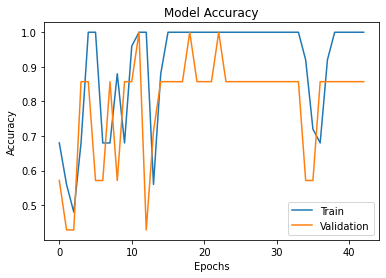

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("hinh_anh_khuon_mat.h5")

In [ ]:
# Tải mô hình 
model_ANN=load_model('hinh_anh_khuon_mat.h5')

Yes


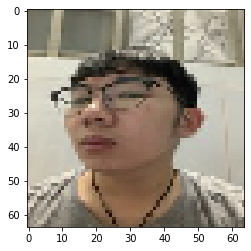

In [ ]:
# Kiểm tra các hình có trong bộ dữ liệu test_set
img=load_img('/content/drive/MyDrive/HuyHoang (1)/Test/a52.jpg',target_size=(64,64))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,12288)
img=img.astype('float32')
img=img/255
result=np.argmax(model_ANN.predict(img),axis=1)
if result==0:
  prediction="No"
if result==1:
  prediction="Yes"
print(prediction)

No


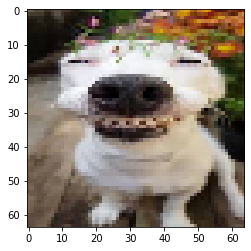

In [ ]:
# Kiểm tra các hình có trong bộ dữ liệu test_set
img=load_img('/content/drive/MyDrive/HuyHoang (1)/Test/h55.jpg',target_size=(64,64))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,12288)
img=img.astype('float32')
img=img/255
result=np.argmax(model_ANN.predict(img),axis=1)
if result==0:
  prediction="No"
if result==1:
  prediction="Yes"
print(prediction)

BÀI_2


In [ ]:
# thư viện tạo địa chỉ
import os
# thư viện đọc hình ảnh
from PIL import Image
# thư viện để chuyển hình thành array
import numpy as np
import math as m
from keras import models
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/robot_bai2.csv')
x=np.array(data.drop(['anpha','beta'],axis=1))
y=np.array(data[['anpha','beta']])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)#test_size lấy 20% tổng số dử liệu để test
x_train.shape

(25920, 2)

In [ ]:
model=Sequential()
model.add(Dense(250, activation='relu', input_shape = (2,))) 
model.add(Dense(120, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(2,  activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 250)               750       
                                                                 
 dense_6 (Dense)             (None, 120)               30120     
                                                                 
 dense_7 (Dense)             (None, 60)                7260      
                                                                 
 dense_8 (Dense)             (None, 30)                1830      
                                                                 
 dense_9 (Dense)             (None, 2)                 62        
                                                                 
Total params: 40,022
Trainable params: 40,022
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse',optimizer=Adam(),metrics=['mean_absolute_error'])
history=model.fit(x_train,y_train,
                  batch_size=200,epochs=1000,verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)]) 
#epochs số lần học,batch_size:lấy dữ liệu để học trong 1 lần học
#verbose=1 thì hiện số lần học

Epoch 1/1000
104/104 [==============================] - 3s 14ms/step - loss: 4560.9961 - mean_absolute_error: 49.5504 - val_loss: 3850.6816 - val_mean_absolute_error: 44.4348
Epoch 2/1000
104/104 [==============================] - 1s 9ms/step - loss: 3670.7520 - mean_absolute_error: 42.7200 - val_loss: 3622.9255 - val_mean_absolute_error: 41.8585
Epoch 3/1000
104/104 [==============================] - 1s 10ms/step - loss: 2362.5959 - mean_absolute_error: 33.2617 - val_loss: 304.6960 - val_mean_absolute_error: 13.5198
Epoch 4/1000
104/104 [==============================] - 1s 11ms/step - loss: 200.1919 - mean_absolute_error: 10.4860 - val_loss: 145.9045 - val_mean_absolute_error: 8.5665
Epoch 5/1000
104/104 [==============================] - 1s 6ms/step - loss: 92.2119 - mean_absolute_error: 6.9453 - val_loss: 54.2527 - val_mean_absolute_error: 5.4568
Epoch 6/1000
104/104 [==============================] - 1s 5ms/step - loss: 47.6238 - mean_absolute_error: 4.8460 - val_loss: 37.5115 - v

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',score[0])
print('Test mean absolute error:',score[1])

Test loss 3.6446962356567383
Test mean absolute error: 1.1906718015670776


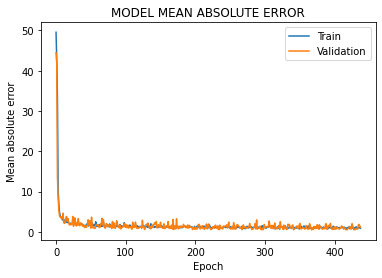

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MODEL MEAN ABSOLUTE ERROR')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred[500]
#phần tử thứ 500 trong mảng

array([ 66.27046, 167.38269], dtype=float32)

In [ ]:
y_test[500]

array([ 67., 168.])

BÀI_3

In [ ]:
# thư viện tạo địa chỉ
import os
# thư viện đọc hình ảnh
from PIL import Image
import numpy as np
import math as m
from keras import models
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/robot_bai3.csv')
x=np.array(data.drop(['anpha','beta','theta'],axis=1))
y=np.array(data[['anpha','beta','theta']])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)#20% tổng số dữ liệu để test
x_train.shape

(25920, 2)

In [ ]:
model=Sequential()
model.add(Dense(250, activation='relu', input_shape = (2,))) 
model.add(Dense(120, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(3,  activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               750       
                                                                 
 dense_1 (Dense)             (None, 120)               30120     
                                                                 
 dense_2 (Dense)             (None, 60)                7260      
                                                                 
 dense_3 (Dense)             (None, 30)                1830      
                                                                 
 dense_4 (Dense)             (None, 3)                 93        
                                                                 
Total params: 40,053
Trainable params: 40,053
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse',optimizer=Adam(),metrics=['mean_absolute_error'])
history=model.fit(x_train,y_train,
                  batch_size=200,epochs=1000,verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)]) 
#epochs số lần học,batch_size:lấy dữ liệu để học trong 1 lần học
#verbose=1 thì hiện số lần học

Epoch 1/1000
104/104 [==============================] - 1s 7ms/step - loss: 3247.2539 - mean_absolute_error: 41.0445 - val_loss: 2396.7168 - val_mean_absolute_error: 33.2092
Epoch 2/1000
104/104 [==============================] - 1s 5ms/step - loss: 2365.3748 - mean_absolute_error: 33.2166 - val_loss: 2347.7095 - val_mean_absolute_error: 32.7110
Epoch 3/1000
104/104 [==============================] - 1s 5ms/step - loss: 2301.9202 - mean_absolute_error: 32.7017 - val_loss: 2249.7913 - val_mean_absolute_error: 31.9793
Epoch 4/1000
104/104 [==============================] - 1s 5ms/step - loss: 1993.0980 - mean_absolute_error: 30.6544 - val_loss: 1371.8097 - val_mean_absolute_error: 26.4845
Epoch 5/1000
104/104 [==============================] - 1s 5ms/step - loss: 452.6747 - mean_absolute_error: 14.7003 - val_loss: 154.7040 - val_mean_absolute_error: 8.8654
Epoch 6/1000
104/104 [==============================] - 1s 5ms/step - loss: 112.8212 - mean_absolute_error: 7.6432 - val_loss: 82.033

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',score[0])
print('Test mean absolute error:',score[1])

Test loss 1.963664174079895
Test mean absolute error: 0.8662759065628052


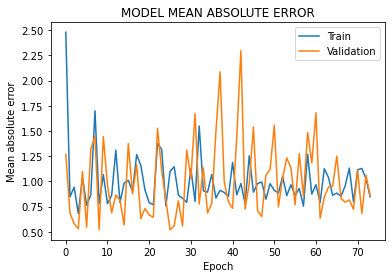

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MODEL MEAN ABSOLUTE ERROR')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred[500]
#phần tử thứ 500 trong mảng

array([ 15.722441, 152.82286 ,  12.085471], dtype=float32)

In [ ]:
y_test[500]

array([ 15., 153.,  12.])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-ext

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'

Bai_4

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/hinhbt4/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 128 images belonging to 3 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/hinhbt4/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 25 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'duy': 0, 'hoang': 1, 'nguyen': 2}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_set,epochs=100,batch_size=20,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)]) # verbose=1 để hiển thị quá trinh học

Epoch 1/100
4/4 [==============================] - 32s 6s/step - loss: 13.3933 - accuracy: 0.4219 - val_loss: 1.9196 - val_accuracy: 0.4000
Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: 1.1139 - accuracy: 0.5312 - val_loss: 0.4891 - val_accuracy: 0.8400
Epoch 3/100
4/4 [==============================] - 2s 394ms/step - loss: 0.4368 - accuracy: 0.8672 - val_loss: 0.1263 - val_accuracy: 0.9600
Epoch 4/100
4/4 [==============================] - 2s 389ms/step - loss: 0.1926 - accuracy: 0.9531 - val_loss: 0.0580 - val_accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 2s 392ms/step - loss: 0.1309 - accuracy: 0.9453 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 2s 391ms/step - loss: 0.0769 - accuracy: 0.9766 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 2s 389ms/step - loss: 0.0278 - accuracy: 1.0000 - val_loss: 0.0285 - val_accuracy: 1.0000
Epoch 8/100
4/4 [

In [ ]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.005072147585451603
Train Accuracy 1.0


<function matplotlib.pyplot.show>

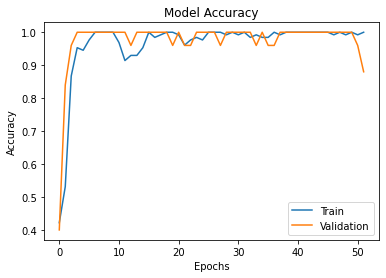

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("Final.h5")

In [ ]:
model_CNN=load_model('Final.h5')

duy


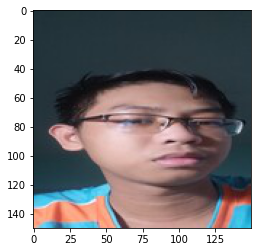

In [ ]:
img=load_img('/content/drive/MyDrive/hinhbt4/test/duy/z3409226703958_58c07aab4996799a72e5c60c1efb229f (1) - Copy.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='duy'
elif round(result[0][1])==1:
  prediction='hoang'
elif round(result[0][2])==1:
  prediction='nguyen'
print(prediction)

hoang


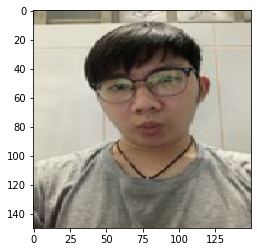

In [ ]:
img=load_img('/content/drive/MyDrive/hinhbt4/test/hoang/a49.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='duy'
elif round(result[0][1])==1:
  prediction='hoang'
elif round(result[0][2])==1:
  prediction='nguyen'
print(prediction)

nguyen


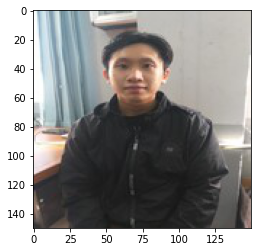

In [ ]:
img=load_img('/content/drive/MyDrive/hinhbt4/test/nguyen/z3410598106006_8d8b9d95e16e5a46ee2703a5b5134006.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='duy'
elif round(result[0][1])==1:
  prediction='hoang'
elif round(result[0][2])==1:
  prediction='nguyen'
print(prediction)

In [ ]:
# Chuyển sang pdf
from google.colab import drive
drive.mount('/content/drive')
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('BAITAPAI.ipynb') # Tên file colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-ext

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'